# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle 

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/ros/SDC/CarND-Traffic-Sign-Classifier-Project/train.p'
testing_file = '/home/ros/SDC/CarND-Traffic-Sign-Classifier-Project/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']


n_classes = len(set(train['labels']))
x_train_split=x_train
y_train_split=y_train

print("Training Set Total:   {} samples".format(len(x_train)))

Training Set Total:   39209 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` the images pixel values, (width, height, channels)
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
#The traffic sign data set dosen't come with data split therefore
#import sklearn model for splitting data into learninig traininig and validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#take 20% of data of the training set for testing(validation) 
n_test = x_test.shape[0]
x_train_split=x_train
y_train_split=y_train
x_train,x_validation,y_train, y_validation = train_test_split(x_train_split, y_train_split, test_size=0.2, random_state=0)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test= x_test.astype('float32')
x_train = x_train / 255 - 0.5
x_validation = x_validation / 255 - 0.5
x_test = x_test / 255 - 0.5

print("Updated image shape {}".format (x_train[0].shape))

print()
print("Training Set:   {} samples".format(len(x_train)))
print("Validation Set: {} samples".format(len(x_validation)))
print("Test Set:       {} samples".format(len(x_test)))
 

print("Number of classes =", n_classes)


Updated image shape (32, 32, 3)

Training Set:   31367 samples
Validation Set: 7842 samples
Test Set:       12630 samples
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

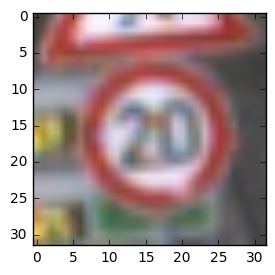

0


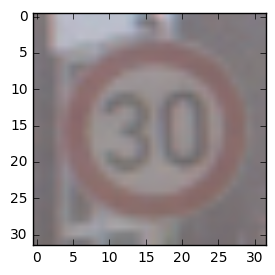

1


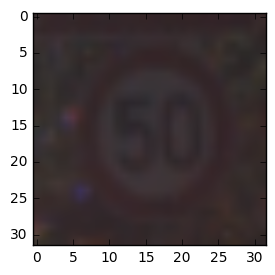

2


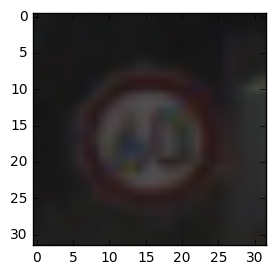

3


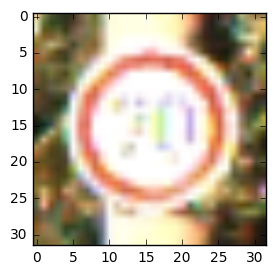

4


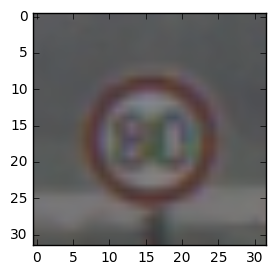

5


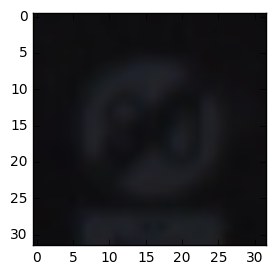

6


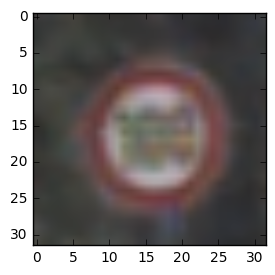

7


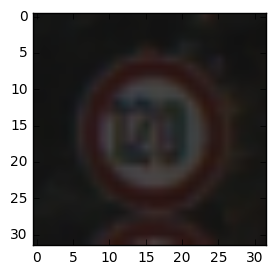

8


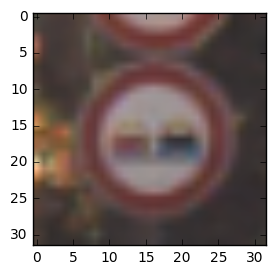

9


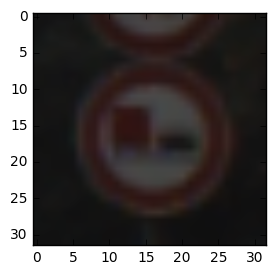

10


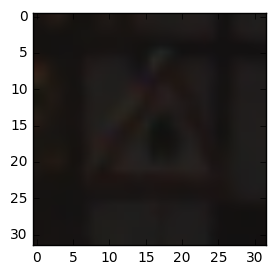

11


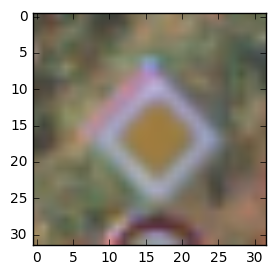

12


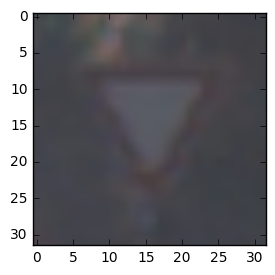

13


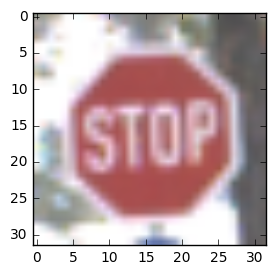

14


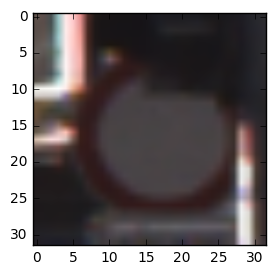

15


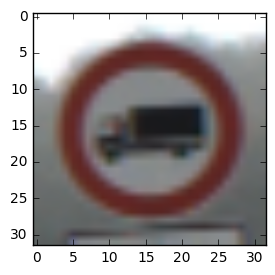

16


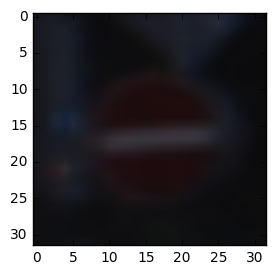

17


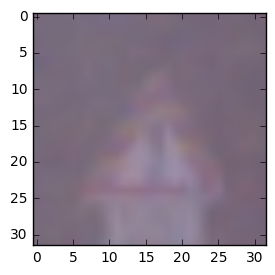

18


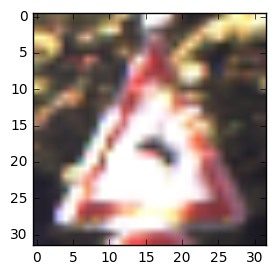

19


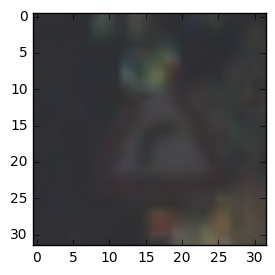

20


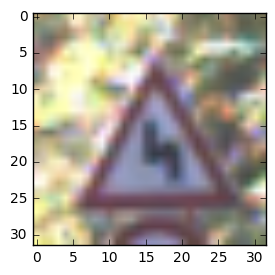

21


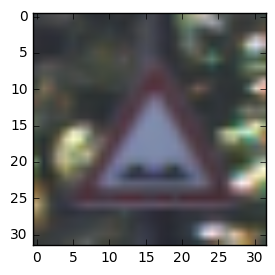

22


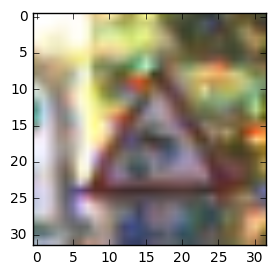

23


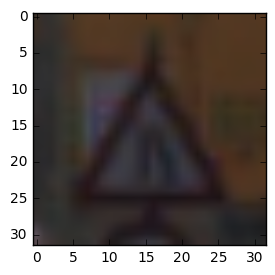

24


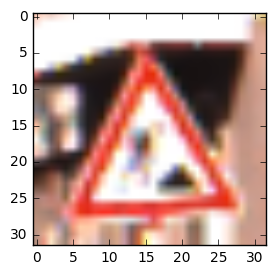

25


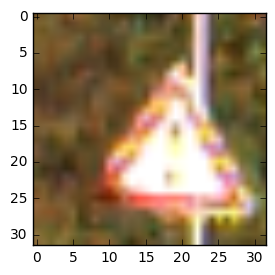

26


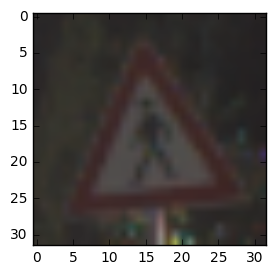

27


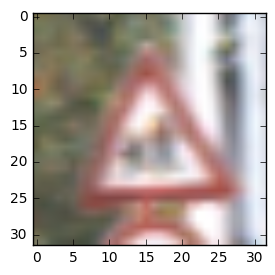

28


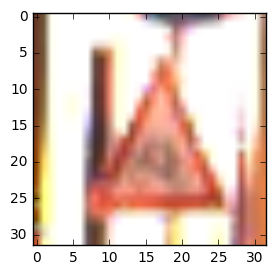

29


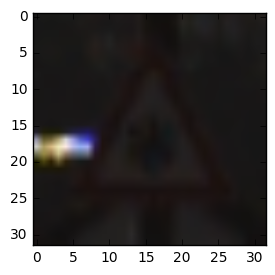

30


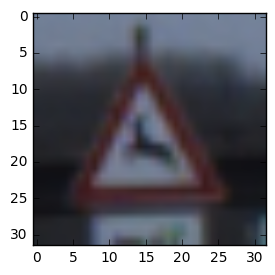

31


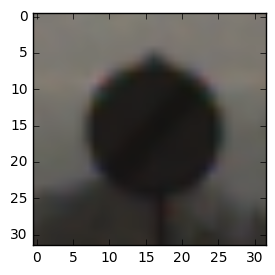

32


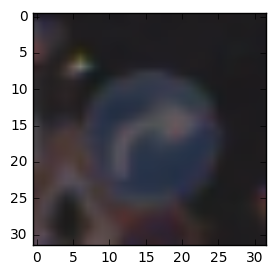

33


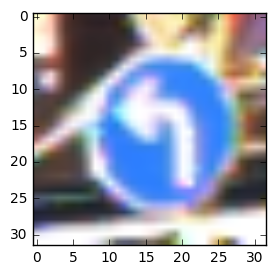

34


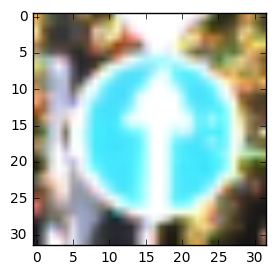

35


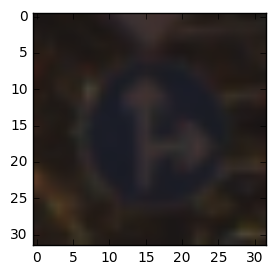

36


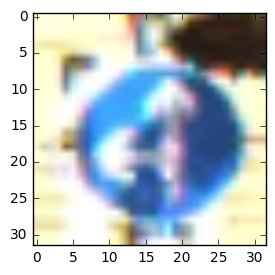

37


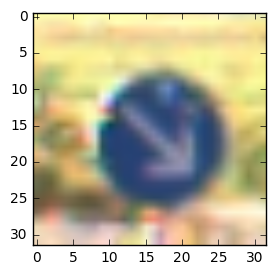

38


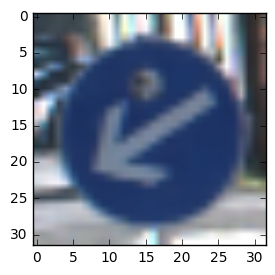

39


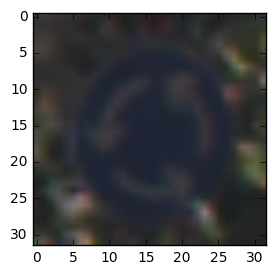

40


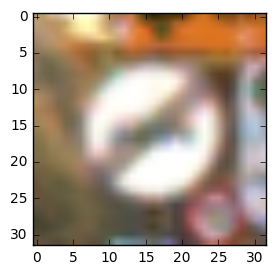

41


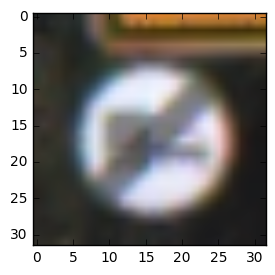

42


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
#Visualize one sample and the corresponding class to verify dataare consistant

import random
import csv
import math
from tqdm import tqdm
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 
    
for i in range(0, n_classes):
    image = train['features'][train['labels'] == i][5]
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.show()
    print(i)
    
 



 


Count of ['Speed limit (20km/h)'] sign is 210 order is 0
Count of ['Speed limit (30km/h)'] sign is 2220 order is 1
Count of ['Speed limit (50km/h)'] sign is 2250 order is 2
Count of ['Speed limit (60km/h)'] sign is 1410 order is 3
Count of ['Speed limit (70km/h)'] sign is 1980 order is 4
Count of ['Speed limit (80km/h)'] sign is 1860 order is 5
Count of ['End of speed limit (80km/h)'] sign is 420 order is 6
Count of ['Speed limit (100km/h)'] sign is 1440 order is 7
Count of ['Speed limit (120km/h)'] sign is 1410 order is 8
Count of ['No passing'] sign is 1470 order is 9
Count of ['No passing for vehicles over 3.5 metric tons'] sign is 2010 order is 10
Count of ['Right-of-way at the next intersection'] sign is 1320 order is 11
Count of ['Priority road'] sign is 2100 order is 12
Count of ['Yield'] sign is 2160 order is 13
Count of ['Stop'] sign is 780 order is 14
Count of ['No vehicles'] sign is 630 order is 15
Count of ['Vehicles over 3.5 metric tons prohibited'] sign is 420 order is 16

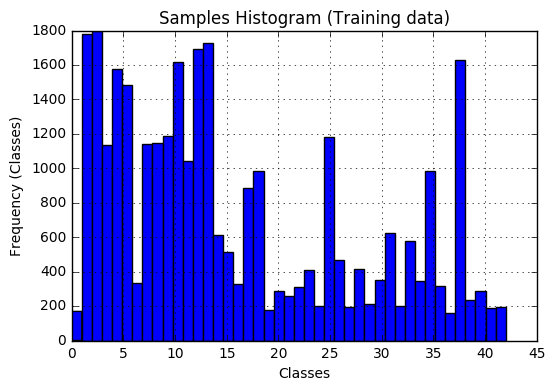

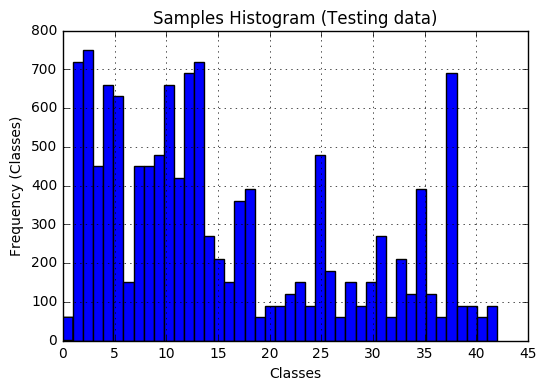

In [4]:
#Plot a histogram of data in order to see the frequency of each sign/class
#Make sure the excell file is included in the director in order to read the meanining of each class, will look cool!
sign_names = {}
n_samples = []

#Open excel file and read its contents for the sign labels(meaning)
with open('/home/ros/SDC/CarND-Traffic-Sign-Classifier-Project/signnames.csv', 'r') as file:
    read_file = csv.DictReader(file)
    for i in read_file:
        sign_names.setdefault(i['ClassId'],[]).append(i['SignName'])
#Itirate through the hist        

for i in range(0, n_classes):
    n_samples.append(len(train['features'][train['labels'] == i]))
    print("Count of", sign_names[str(i)], "sign is", n_samples[i], "order is", i)
    
plt.figure(1)
n_class_list, _, _ = plt.hist(y_train, n_classes)
plt.title("Samples Histogram (Training data)")
plt.xlabel("Classes")
plt.ylabel("Frequency (Classes)")
plt.grid(True)

plt.figure(2)
plt.hist(y_test, n_classes)
plt.title("Samples Histogram (Testing data)")
plt.xlabel("Classes")
plt.ylabel("Frequency (Classes)")
plt.grid(True)

plt.show()    
    


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** The datatasets consist of 32x32 rgb images. I normalized the samples to the range of -0.5 and 0.5.Normalization is important in CNNs because of their learning process. CNNs learn by continually adding gradient error vectors computed from backpropagation to various weight matrices 
If I dont scale the input training vectors the ranges of our distributions of feature values would be different for each feature,resulting in corrections in each differing dimension.

While converting the images into gray scale and normalizing their histogram may sound like a good filtering strategy, I think that the images work best in their RGB format. This is very significant in real life scenarios where traffic-signals have to be identified when other objects are present in the background or on the street. 

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#I splitted the data in part one.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I've used a split function from sklearn library to split data into training and validation 80%-20%. Then I've randomized the samples. 

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 80
BATCH_SIZE = 150

In [9]:
#Define methods 

from tensorflow.contrib.layers import flatten
mu = 0
sigma = 0.1
n_classes=43
layer_depth = {
    'layer_1': 6,
    'layer_2': 16,
    'fully_connected_1': 120,
    'fully_connected_2': 84,
    'fully_connected_logits': 43
}

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 3, layer_depth['layer_1']],mean = mu, stddev = sigma)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_depth['layer_1'], layer_depth['layer_2']],mean = mu, stddev = sigma)),
    'fully_connected_1': tf.Variable(tf.truncated_normal(
        [400,layer_depth['fully_connected_1']],mean = mu, stddev = sigma)),
    'fully_connected_2': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected_1'],layer_depth['fully_connected_2']],mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected_2'], n_classes],mean = mu, stddev = sigma))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'fully_connected_1': tf.Variable(tf.zeros(layer_depth['fully_connected_1'])),
    'fully_connected_2': tf.Variable(tf.zeros(layer_depth['fully_connected_2'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x
    #return tf.nn.tanh(x)
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The overal archetecture is a cnn that consists of 2 layers with depth of 6 and 16 respectivly. Then two fully connected layers with a depth of 120 and 84 respectivly. The last connected logits layer classified the results into 43 classes using Adamoptimizer.  
The detailed archetecture includes Conv -> ACT(Relu) -> maxPool -> Conv -> ACT(Relu) -> maxPool -> flatten -> Fully Connected -> ACT(ReLu) -> Dropout-> Fully Connected -> ACT(ReLu) -> Dropout -> Fully Connected (Logits)




In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

 
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1 
    dropout=0.55
 
 # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'] ) 
# TODO: Activation.
    conv1 = tf.nn.relu(conv1)
# TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1=maxpool2d(conv1)
# TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'] ) 
# TODO: Activation.
    conv2 = tf.nn.relu(conv2)
# TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2=maxpool2d(conv2)
# TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1   = flatten(conv2)
# TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
 
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected_1']),
        biases['fully_connected_1'])
#fc1 = tf.nn.tanh(fc1)
# TODO: Activation.
    fc1 = tf.nn.relu(fc1)
# Drop_out
    fc1 = tf.nn.dropout(fc1, dropout) 
# TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(
        tf.matmul(fc1, weights['fully_connected_2']),
        biases['fully_connected_2'])
#fc2 = tf.nn.tanh(fc2)
# TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    # Drop_out
    fc2 = tf.nn.dropout(fc2, dropout) 
# TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(
        tf.matmul(fc2, weights['out']),
        biases['out'])
#logits = tf.nn.tanh(logits)
    return logits



In [11]:
#Place holder for patches, which is initialized to none in order to accept any patch size
#y stores our labels who come with sparse value
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

#one hot encode the labels
one_hot_y = tf.one_hot(y, 43)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I've setup 100 epochs (thanks to Amazon cloud) and with a patch size of 128 samples. For optimization I  used Adam optimizer to minimize the loss. I kept the rate at 0.001 as I empirically tested several rates and found out that this is a good option. I've also used a drop out of 0.55.  

In [12]:
#The pipeline is as follows
#how queckly to update the network weights
rate = 0.001

logits = LeNet(x)
###
prediction = tf.nn.softmax(logits)#here i use softmax, later on i will feed the new images using this
cross_entropy = -tf.reduce_sum(one_hot_y * tf.log(prediction + 1e-6), reduction_indices=1)
loss = tf.reduce_mean(cross_entropy)
###



#tis line will be used for test data without labels
#prediction = tf.nn.softmax(logits)
#train the logits and compare them to the ground truth hot encoded labels
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
#Cross-entropy avereging from all images
#loss_operation = tf.reduce_mean(cross_entropy)
#Adam Optimizer to mimimize the loss 
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
#path propagation to update the network
#training_operation = optimizer.minimize(loss_operation)

training_operation = optimizer.minimize(loss)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**In my solution I used the LaNet architecture with some improvements. I have used pooling and drop out to improve the accuracy of the model and lower the overfitting risk. The LaNet is well known convolutional network architecture that has been successfully used for image classification. I've decided the number of epoch after I trained the network with 150 epoches and observed when the network converged. I recommend training with atleast 48 epoches because thats where the network semme to converge. Adding more epoches increases the risk of overfitting. 
For tuning the hyper parameters I used my intuition. However, a lot of testing and tweaking were required.

In [13]:
#This section of the code was adopted form the SDC course, traffic sign recognition
#Compare the logit prediction to the one-hot encoded ground truth label 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

#Average individual prediction accuraccies to get the overall accuracy
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# create patches and run them 
def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [14]:
#This section of the code was adopted form the SDC course, traffic sign recognition
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    sess.run(tf.initialize_all_variables())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(x_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.423

EPOCH 2 ...
Validation Accuracy = 0.626

EPOCH 3 ...
Validation Accuracy = 0.714

EPOCH 4 ...
Validation Accuracy = 0.774

EPOCH 5 ...
Validation Accuracy = 0.811

EPOCH 6 ...
Validation Accuracy = 0.840

EPOCH 7 ...
Validation Accuracy = 0.846

EPOCH 8 ...
Validation Accuracy = 0.874

EPOCH 9 ...
Validation Accuracy = 0.877

EPOCH 10 ...
Validation Accuracy = 0.889

EPOCH 11 ...
Validation Accuracy = 0.894

EPOCH 12 ...
Validation Accuracy = 0.901

EPOCH 13 ...
Validation Accuracy = 0.904

EPOCH 14 ...
Validation Accuracy = 0.916

EPOCH 15 ...
Validation Accuracy = 0.918

EPOCH 16 ...
Validation Accuracy = 0.924

EPOCH 17 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.926

EPOCH 19 ...
Validation Accuracy = 0.925

EPOCH 20 ...
Validation Accuracy = 0.935

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 22 ...
Validation Accuracy = 0.938

EPOCH 23 ...
Validation Accuracy = 0.941

EPOCH 24 ...
Validation Accura

In [20]:
#Test the performance of the model on the 20% of traffic signs that we have splitted 

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(x_test, y_test)
    len_x_test=len(x_test)
    prediction=test_accuracy * len_x_test
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    


 

Test Accuracy = 0.917


'\ntest_pred = np.zeros(n_test, dtype=np.int)\n \n# Confusion matrix:\ncm = confusion_matrix(y_true=y_test, y_pred=test_pred)\nplt.figure(figsize=(15, 15))\nplt.imshow(cm, interpolation=\'nearest\')\nplt.title("Confusion Matrix")\nplt.colorbar()\ntick_marks = np.arange(n_classes)\nplt.yticks(tick_marks, range(n_classes))\nplt.xticks(tick_marks, range(n_classes))\nplt.ylabel(\'True Class\')\nplt.xlabel(\'Predicted Class\')\nplt.tight_layout()\nplt.show()\n\nprint (len(test_pred))\n'

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

1


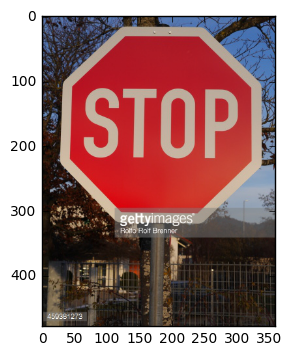

2


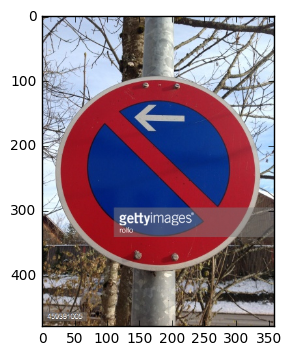

3


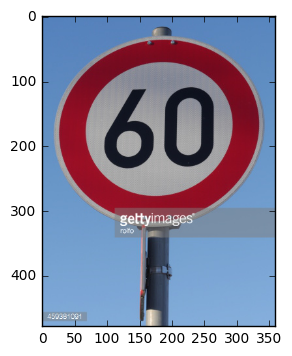

4


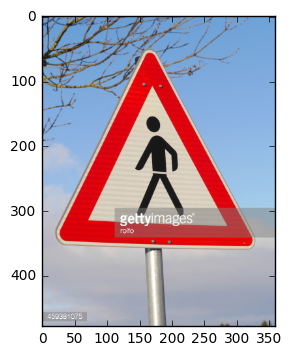

5


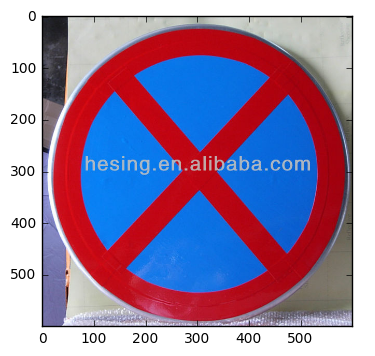

6


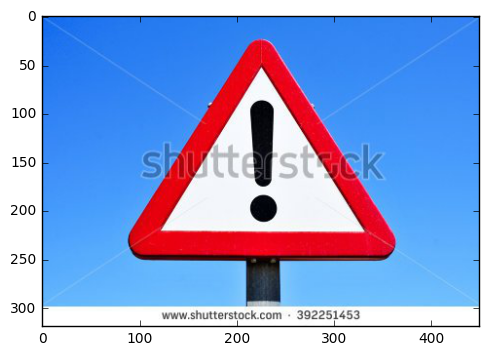

7


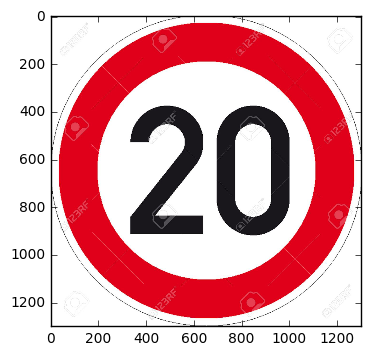

(7, 32, 32, 3)


In [14]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
real_imgs = []
for i in range(1, 8):
    print(i)
    img=cv2.imread('image_{}.jpg'.format(str(i)))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img = img  / 255 - 0.5
    resize_img = cv2.resize(img, (32, 32))
    resize_img = np.reshape(np.asarray(resize_img), [32, 32, 3])
    real_imgs.append(resize_img)
    plt.show()
                
real_imgs = np.asarray(real_imgs)
#real_imgs = real_imgs.astype('float32')
#real_imgs = real_imgs  / 255 - 0.5
print(real_imgs.shape)


 

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Images were downloaded from google image search. Some images were too big to be resized and others had background. 

In [17]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
#new_prediction=tf.placeholder(tf.float32,(5,32,32,3) )

#logits=LeNet(initial_real_presictions)
import tensorflow as tf 
with tf.Session() as sess:
    #sess.run(tf.initialize_all_variables())
    loader_2 = tf.train.import_meta_graph('lenet.meta')
    loader_2.restore(sess, tf.train.latest_checkpoint('./'))
     
    #new_predictions = sess.run(prediction, feed_dict={x: real_imgs})
    new_prediction = sess.run(prediction, feed_dict={x: real_imgs})


print(new_prediction)


[[  0.00000000e+00   1.59387485e-21   2.02388555e-18   2.03237615e-15
    3.43146968e-33   5.14756356e-29   2.57304202e-27   6.02340677e-10
    4.76904280e-29   3.90678704e-25   8.57798572e-25   1.78582279e-12
    2.19841769e-24   1.22363528e-26   9.09276655e-34   0.00000000e+00
    1.60033336e-13   1.13164396e-17   2.13951417e-21   1.31682863e-23
    1.05753488e-11   4.87156812e-15   0.00000000e+00   3.17707588e-07
    2.76574892e-14   2.04455752e-26   1.13761837e-37   7.49286371e-21
    5.93509739e-08   2.52904152e-24   7.00049475e-02   6.17512297e-17
    1.78192203e-25   9.29616749e-01   7.77629697e-12   2.77405841e-11
    2.84258706e-25   1.16502750e-14   6.21611137e-15   6.23365978e-15
    3.77908844e-04   2.03741815e-11   4.85369524e-19]
 [  3.14386331e-34   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   2.90456729e-37   0.00000000e+00
    0.00000000e+00   6.18401071e-32   1.61417928e-11   9.70982856e-25
    1.00000000e+00   4.13632076e-24 

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** No, it wasn't able to perform equally well. 1 out of the 7 signs was correctly predicted. This is about 14% of prediction accuracy. The prediction accuracy from using the validation sets was 92%. I'll explain why I think the prediction accuracy was very low on the captured pictures in the section below. The 92% prediction accuracy on the validation datasets is withing the average of what many other udacity students achieved. However, I think it's impractical because the datasets samples are limited. Each image in the datasets is repeated up to 60 times and slightly zoomed in. The effect of that is high validation accuracy and low performance in the wild.  
  


In [18]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
max_value = np.argmax(new_prediction[0])
print(max_value)  

max_value = np.argmax(new_prediction[1])
print(max_value) 

max_value = np.argmax(new_prediction[2])
print(max_value)  

max_value = np.argmax(new_prediction[3])
print(max_value) 

max_value = np.argmax(new_prediction[4])
print(max_value)  

max_value = np.argmax(new_prediction[5])
print(max_value)  

max_value = np.argmax(new_prediction[6])
print(max_value) 

33
12
28
36
1
37
31


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
 
with tf.Session() as sess:
    #probabilities = tf.nn.top_k(new_predictions, k=5)

#values, indices = sess.run(probabilities)
    values, indices = sess.run(tf.nn.top_k(new_prediction, 5))
    for i in range(0, 5):
        for j in range(0, 7):
            print(sign_names[str(indices[j][i])], values[j][i])
        print("\n")
    
    
    #sess.run(tf.initialize_all_variables())
    #print(sess.run(tf.nn.top_k(new_predictions, 5), feed_dict={x: real_imgs}))

['Turn right ahead'] 0.929617
['Priority road'] 1.0
['Children crossing'] 0.981475
['Go straight or right'] 0.999654
['Speed limit (30km/h)'] 0.841574
['Go straight or left'] 1.0
['Wild animals crossing'] 0.999503


['Beware of ice/snow'] 0.0700049
['Traffic signals'] 3.36609e-09
['Bicycles crossing'] 0.0178442
['Go straight or left'] 0.000336881
['Speed limit (50km/h)'] 0.158413
['Traffic signals'] 3.88388e-09
['Speed limit (20km/h)'] 0.00047403


['Roundabout mandatory'] 0.000377909
['No entry'] 1.80386e-10
['Bumpy road'] 0.00042203
['No entry'] 5.88788e-06
['Wild animals crossing'] 1.18969e-05
['Priority road'] 1.16493e-14
['Bumpy road'] 1.70264e-05


['Slippery road'] 3.17708e-07
['No passing for vehicles over 3.5 metric tons'] 1.61418e-11
['No entry'] 0.000208733
['Keep right'] 3.47112e-06
['End of all speed and passing limits'] 2.81698e-07
['No entry'] 5.82054e-18
['Bicycles crossing'] 5.80205e-06


['Children crossing'] 5.9351e-08
['Stop'] 1.30568e-14
['Dangerous curve to the ri

**Answer:** The prediction accuracy rate on the web acquired images that is shown in the top 7 prediction results is 14%. This is very low compared to the 92% on the validation images. The prediction shows that priority road was accurately predicted with a high certainty. However, the other signs weren't  predicted. This very low prediction could likely be attributed to the image resizing (32 x 32) effect, as well as the watermarking on some of the images.  For improving the prediction I suggest to collect samples with a higher resolution and build a CNN that can accept larger size of images.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.